Demo for using 

In [17]:
%matplotlib inline
import time
import re
import urllib2
from pydap.client import open_url
import matplotlib.pyplot as plt



In [34]:
tds_url_base='http://dataserver.nccs.nasa.gov/thredds/bypass/NEX-DCP30/bcsd'
scenarios=['historical','rcp26','rcp45','rcp60','rcp85']
url_step2='r1i1p1'
variables=['tasmin','tasmax','pr']
    
def fetch_model_list(scenario):
    """Get models, which are available for particular scenario"""
    xmlpath="/".join([tds_url_base,scenario,'r1i1p1','catalog.xml'])
    #print(xmlpath)
    abxml=urllib2.urlopen(xmlpath)
    prog=re.compile("name=\"[a-zA-Z0-9\-\_]+_pr.ncml\"")
    mudell={}
        
    for i in abxml.readlines():
        a=prog.search(i)
        #print(i)
        if a:
            # no need to really initialise the opendap endpoint
            mudell[a.group().split('=')[1].split('.')[0][1:]]=open_url('http://dataserver.nccs.nasa.gov/thredds/dodsC/bypass/NEX-DCP30/bcsd/rcp45/r1i1p1/'+a.group().split('=')[1].split('.')[0][1:]+'.ncml')
    return mudell
modellist={}
for i in scenarios:
    modellist[i]=fetch_model_list(i)

http://dataserver.nccs.nasa.gov/thredds/bypass/NEX-DCP30/bcsd/historical/r1i1p1/catalog.xml
http://dataserver.nccs.nasa.gov/thredds/bypass/NEX-DCP30/bcsd/rcp26/r1i1p1/catalog.xml
http://dataserver.nccs.nasa.gov/thredds/bypass/NEX-DCP30/bcsd/rcp45/r1i1p1/catalog.xml
http://dataserver.nccs.nasa.gov/thredds/bypass/NEX-DCP30/bcsd/rcp60/r1i1p1/catalog.xml
http://dataserver.nccs.nasa.gov/thredds/bypass/NEX-DCP30/bcsd/rcp85/r1i1p1/catalog.xml


In [35]:
for i in modellist:
    print(i,len(modellist[i]))

('rcp45', 33)
('rcp60', 17)
('rcp26', 23)
('historical', 33)
('rcp85', 31)


In [26]:
testdat1=modellist['historical']['CESM1-CAM5_pr']['CESM1-CAM5_pr']['CESM1-CAM5_pr'][:,1500,1500]

In [28]:
testdat1.shape

(1128, 1, 1)

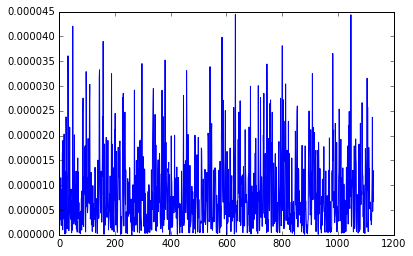

In [29]:
plt.plot(testdat1[:,0,0])

In [36]:
t1=time.time()
precdata_all={}
for s in scenarios:
    precdata_all[s]={}
    for m in modellist[s]:
        precdata_all[s][m]=modellist[s][m][m][m][:,1500,1500]
t2=time.time()
print('It took {0} seconds to download data for all models/scenarios'.format(t2-t1))

It took 14292.2202671 seconds to download data for all models/scenarios


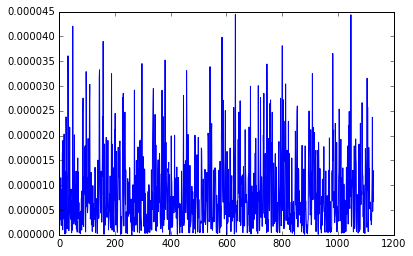

In [44]:
plt.plot(precdata_all['historical']['CESM1-CAM5_pr'][:,0])

In [45]:
precdata_all

{'historical': {'ACCESS1-0_pr': array([[[  3.15255784e-05]],
  
         [[  7.47286413e-06]],
  
         [[  6.51207256e-06]],
  
         ..., 
         [[  1.20131890e-05]],
  
         [[  5.82321718e-06]],
  
         [[  6.33452692e-06]]], dtype=float32),
  'BNU-ESM_pr': array([[[  1.56521867e-06]],
  
         [[  2.06322761e-06]],
  
         [[  1.28285376e-06]],
  
         ..., 
         [[  4.13974749e-06]],
  
         [[  5.44185059e-06]],
  
         [[  8.86680652e-07]]], dtype=float32),
  'CCSM4_pr': array([[[  2.99931571e-06]],
  
         [[  7.04656713e-06]],
  
         [[  1.22069914e-05]],
  
         ..., 
         [[  5.50824279e-06]],
  
         [[  3.80702272e-06]],
  
         [[  1.72173059e-05]]], dtype=float32),
  'CESM1-BGC_pr': array([[[  1.38272535e-05]],
  
         [[  1.68784936e-05]],
  
         [[  2.58189317e-07]],
  
         ..., 
         [[  8.35465653e-06]],
  
         [[  7.67121037e-06]],
  
         [[  6.81348638e-07]]], dtype=float3